$g_{i}$ and $e_{ji}$ are the eigenvalues and components of eigenvectors of the matrix A, respectively.

$f_{i}$ and $I_{ji}$ are the eigenvalues and components of eigenvectors of the matrix B, respectively.

In our notation the subscript j always denotes the planet number while the subscript i always denotes the mode number.

# Jupiter and Saturn from chapter 7 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from scipy.integrate import quad
from numpy.linalg import eig

In [2]:
#--- Required information of Jupiter (1) and Saturn (2) --------
number_of_planets = 2

m1_mc = 9.54786 * 10**-4
a1 = 5.202545 #AU
n1 = 30.3374 #deg/year
e1 = 0.0474622
w1 = 13.983865 #deg
I1 = 1.30667 #deg
omega_1 = 100.0381 #deg

m2_mc = 2.85837 * 10**-4
a2 = 9.554841 #AU
n2 = 12.1890 #deg/year
e2 = 0.0575481
w2 = 88.719425 #deg
I2 = 2.48795 #deg
omega_2 = 113.1334 #deg

#Array of eccentricity, Inclination, longitude of pericenter,
#longitude of ascending node, increasing order of semi-major axis,
#mean motion in degree/year and mass/mass_of_star, respectively.
e = np.array([e1,e2])
I = np.array([I1,I2]) #deg
w = np.array([w1,w2]) #deg
omega = np.array([omega_1,omega_2]) #(Ω)
a = np.array([a1,a2]) #AU
n = np.array([n1,n2]) #deg/year
m_mc = np.array([m1_mc,m2_mc])

#Integratin functionality
def b_1(x):
    return (1/pi)*(np.cos(x)/(1 - 2*alpha*np.cos(x) + alpha**2
                             )**(3/2))
# ans_b1,err_b2=quad(b_1,0,2*pi)
def b_2(x):
    return (1/pi)*(np.cos(2*x)/(1 - 2*alpha*np.cos(x) + alpha**2
                             )**(3/2))

#Matrices (A & B)

A = np.zeros((number_of_planets,number_of_planets))
B = np.zeros((number_of_planets,number_of_planets))

for j in range(0,number_of_planets):
    for k in range(0,number_of_planets):
        if k!=j:
            if k<j:
                alpha = a[k]/a[j] 
                alpha_bar = 1
            if k>j:
                alpha = a[j]/a[k]
                alpha_bar = alpha
            ans_b1,err_b1 = quad(b_1,0,2*pi)
            ans_b2,err_b2 = quad(b_2,0,2*pi)
            A[j,j] = n[j] * (1/4) * (m_mc[k]/(1 + m_mc[j])) * alpha * alpha_bar * ans_b1
            A[j,k] = -n[j] * (1/4) * (m_mc[k]/(1 + m_mc[j])) * alpha * alpha_bar * ans_b2
            B[j,j] = -n[j] * (1/4) * (m_mc[k]/(1 + m_mc[j])) * alpha * alpha_bar * ans_b1
            B[j,k] = n[j] * (1/4) * (m_mc[k]/(1 + m_mc[j])) * alpha * alpha_bar * ans_b1
            

# Calculting eigenvalues(deg/year) and eigenvectors
eigvals_A, eigvecs_A = eig(A)
# f'{eigvals_B[1]:.{5}e}'

#Eigvectors of B have units of radians
eigvals_B, eigvecs_B = eig(B)

In [3]:
eigvecs_A

array([[-0.77799125,  0.31116203],
       [-0.62827511, -0.95035688]])

In [4]:
eigvals_B

array([ 0.        , -0.00706251])

At t=0:

$h_{j} = \sum_{i=1}^{n} S_{i}sin(\beta_{i}) \times \bar{e_{ji}}$

$k_{j} = \sum_{i=1}^{n} S_{i}cos(\beta_{i}) \times \bar{e_{ji}}$

$p_{j} = \sum_{i=1}^{n} T_{i}sin(\gamma_{i}) \times \bar{I_{ji}}$

$q_{j} = \sum_{i=1}^{n} T_{i}cos(\gamma_{i}) \times \bar{I_{ji}}$

In [5]:
# Inclination was converted into radians
h = e * np.sin(w * (pi/180))
k = e * np.cos(w * (pi/180))
p = (I*(pi/180)) * np.sin(omega * (pi/180))
q = (I*(pi/180)) * np.cos(omega * (pi/180))

#Solving for Sbeta,Tgamma
S_sinB = np.linalg.solve(eigvecs_A,h)
S_cosB = np.linalg.solve(eigvecs_A,k)
T_sinG = np.linalg.solve(eigvecs_B,p)
T_cosG = np.linalg.solve(eigvecs_B,q)

#Solving for S,beta,T,gamma
beta = np.arctan(S_sinB/S_cosB) #rad
gamma = np.arctan(T_sinG/T_cosG) #rad

S = abs(S_sinB/np.sin(beta))
T = abs(T_sinG/np.sin(gamma))

In [6]:
# Scaled eigenvectors
scaled_eigvecA = eigvecs_A * S
scaled_eigvecB = eigvecs_B * T #rad

In [7]:
scaled_eigvecA

array([[-0.04388212,  0.01557877],
       [-0.03543747, -0.04758096]])

### Eccentricity of planet j as a function of time:

$e_{j}(t) = (h^{2}_{j} + k_{j}^{2})^{1/2}$

### Inclination of planet j as a function of time:

$I_{j}(t) = (p^{2}_{j} + q_{j}^{2})^{1/2}$

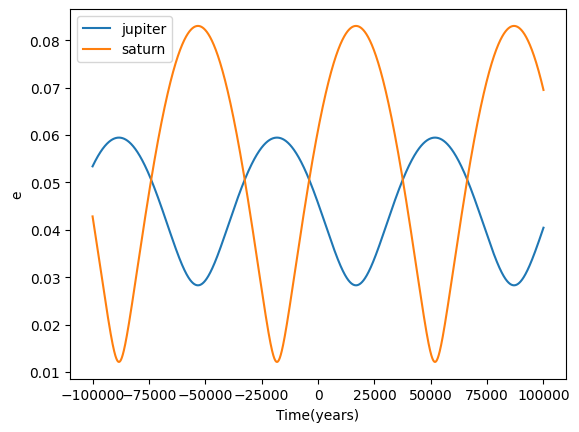

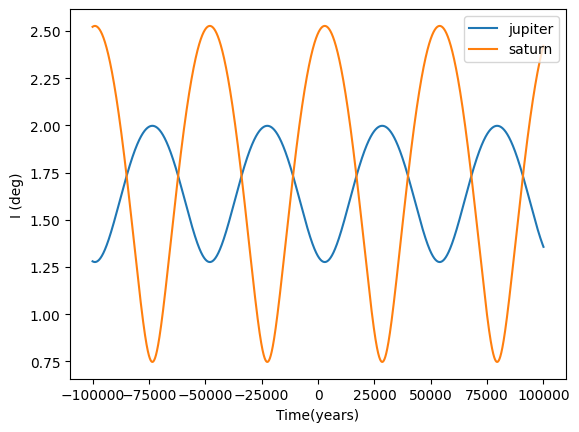

In [8]:
iterations = 10**5
timeline = np.linspace(-10**5,10**5,iterations)

h_time = np.zeros([number_of_planets,iterations])
k_time = np.zeros([number_of_planets,iterations])
p_time = np.zeros([number_of_planets,iterations])
q_time = np.zeros([number_of_planets,iterations])

for i in range(iterations):
    h_time[:,i] = np.matmul(scaled_eigvecA,np.sin(eigvals_A*timeline[i]*(pi/180) + beta))
    k_time[:,i] = np.matmul(scaled_eigvecA,np.cos(eigvals_A*timeline[i]*(pi/180) + beta))
    p_time[:,i] = np.matmul(scaled_eigvecB,np.sin(eigvals_B*timeline[i]*(pi/180) + gamma))
    q_time[:,i] = np.matmul(scaled_eigvecB,np.cos(eigvals_B*timeline[i]*(pi/180) + gamma))


e_time = np.sqrt(h_time**2 + k_time**2)
I_time = np.sqrt(p_time**2 + q_time**2) #rad

plt.plot(timeline,e_time[0],label='jupiter')
plt.plot(timeline,e_time[1],label='saturn')
plt.legend()
plt.xlabel('Time(years)')
plt.ylabel('e')
plt.show()

plt.plot(timeline,I_time[0]*(180/pi),label='jupiter')
plt.plot(timeline,I_time[1]*(180/pi),label='saturn')
plt.legend()
plt.xlabel('Time(years)')
plt.ylabel('I (deg)')
plt.show()

# Uranus system

## Calculating eigenfrequencies and eigenvectors

In [9]:
#--- Required information ---------------------------------
number_of_planets = 5
density = 1.3*((10**-3)/((10**-2)**3)) #kg/m^3
G = 6.67 * 10**-11 # m^3 kg^-1 s^-2
gm = 5.784184 * 10**6 #km^3 s^-2
J2 = 3.3450*10**-3
J4 = -3.21*10**-5
R_p = 26200 #km
rad_sec = (180/pi) *(1/(3.17098*10**-8)) #deg/year

#Array of eccentricity, Inclination, longitude of pericenter,
#longitude of ascending node, increasing order of semi-major axis,
#mean motion in degree/year and mass/mass_of_star, respectively.
a = np.array([129775,190822,265832,436035,583117]) #km
e = np.array([0.0027,0.0034,0.0050,0.0022,0.0008])
w = np.array([111,120,193,147,212]) #deg
I = np.array([4.22,0.31,0.36,0.142,0.101]) #deg
omega = np.array([21,263,279,311,234]) #(Ω)
radius = np.array([250,665,555,800,815]) #km
m_mc = (G*density*((4/3)*pi*radius**3))/gm
n = np.sqrt((gm*(1+m_mc))/a**3)*rad_sec #deg/year

#Matrices (A & B)

A = np.zeros((number_of_planets,number_of_planets))
B = np.zeros((number_of_planets,number_of_planets))

for j in range(0,number_of_planets):
    dummy_sum = 0
    for k in range(0,number_of_planets):
        if k!=j:
            if k<j:
                alpha = a[k]/a[j] 
                alpha_bar = 1
            if k>j:
                alpha = a[j]/a[k]
                alpha_bar = alpha
            ans_b1,err_b1 = quad(b_1,0,2*pi)
            ans_b2,err_b2 = quad(b_2,0,2*pi)
            
            A[j,k] = -n[j] * (1/4) * m_mc[k] * alpha * alpha_bar * ans_b2
            B[j,k] = n[j] * (1/4) * m_mc[k] * alpha * alpha_bar * ans_b1
            
            dummy_sum += m_mc[k] * alpha * alpha_bar * ans_b1
            
    A[j,j] = n[j] *((3/2)*J2*(R_p/a[j])**2 - (9/8)*(J2**2)*
                    (R_p/a[j])**4 - (15/4)*J4*(R_p/a[j])**4 + (1/4)*dummy_sum)
    B[j,j] = -n[j] *((3/2)*J2*(R_p/a[j])**2 - (27/8)*(J2**2)*
                    (R_p/a[j])**4 - (15/4)*J4*(R_p/a[j])**4 + (1/4)*dummy_sum)



# Calculting eccentrcity eigenvalues(deg/year) and eigenvectors
eigvals_A, eigvecs_A = eig(A)
idx = eigvals_A.argsort()[::-1]   
eigvals_A = eigvals_A[idx]
eigvecs_A = eigvecs_A[:,idx]
eigvals_A=eigvals_A.real

#Calculating inclination(radians) eigenvalues(deg/year) and eigvectors(rad)
eigvals_B, eigvecs_B = eig(B)
idx = eigvals_B.argsort()[::1]   
eigvals_B = eigvals_B[idx]
eigvecs_B = eigvecs_B[:,idx]
eigvals_B=eigvals_B.real

## Plotting Inclination and Eccentricity as function of time

In [10]:
# Inclination was converted into radians
h = e * np.sin(w * (pi/180))
k = e * np.cos(w * (pi/180))
p = (I*(pi/180)) * np.sin(omega * (pi/180))
q = (I*(pi/180)) * np.cos(omega * (pi/180))

#Solving for Sbeta,Tgamma
S_sinB = np.linalg.solve(eigvecs_A,h)
S_cosB = np.linalg.solve(eigvecs_A,k)
T_sinG = np.linalg.solve(eigvecs_B,p)
T_cosG = np.linalg.solve(eigvecs_B,q)

#Solving for S,beta,T,gamma
beta = np.arctan(S_sinB/S_cosB) #rad
gamma = np.arctan(T_sinG/T_cosG) #rad

S = abs(S_sinB/np.sin(beta))
T = abs(T_sinG/np.sin(gamma))

In [11]:
# Scaled eigenvectors
scaled_eigvecA = eigvecs_A * S
scaled_eigvecB = eigvecs_B * T #rad

In [12]:
eigvecs_B[:,0]

array([-9.99992387e-01,  3.88796891e-03,  3.28660693e-04,  4.60310767e-05,
        1.43568068e-05])

In [13]:
eigvals_B

array([-20.58713879,  -5.99857597,  -2.83711258,  -1.69416735,
        -0.24841222])

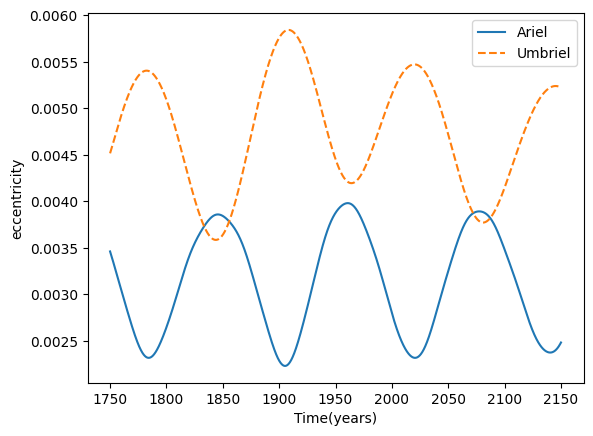

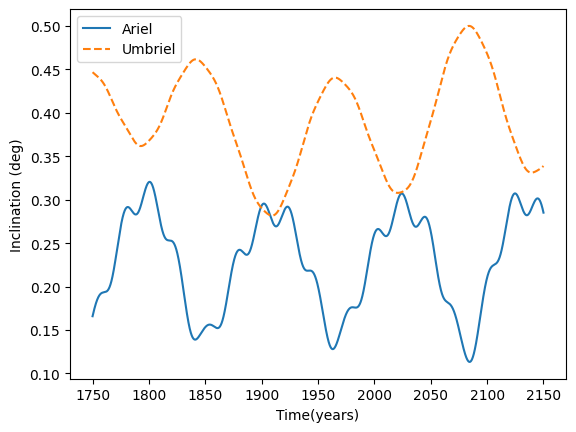

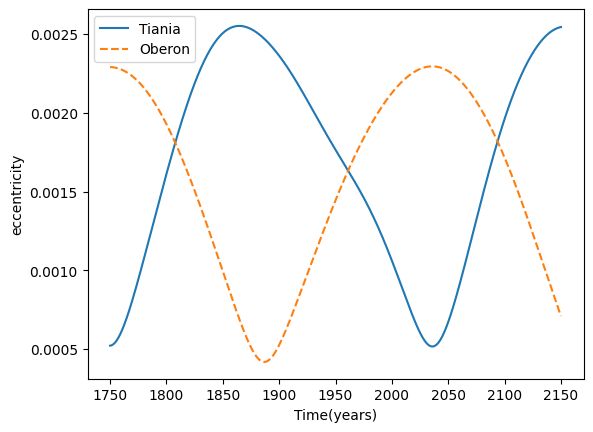

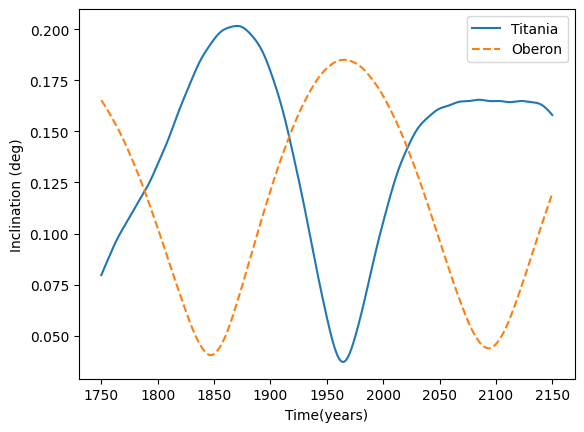

In [14]:
iterations = 10**5
timeline = np.linspace(1750,2150,iterations)

h_time = np.zeros([number_of_planets,iterations])
k_time = np.zeros([number_of_planets,iterations])
p_time = np.zeros([number_of_planets,iterations])
q_time = np.zeros([number_of_planets,iterations])

for i in range(iterations):
    h_time[:,i] = np.matmul(scaled_eigvecA,np.sin(eigvals_A*timeline[i]*(pi/180) + beta))
    k_time[:,i] = np.matmul(scaled_eigvecA,np.cos(eigvals_A*timeline[i]*(pi/180) + beta))
    p_time[:,i] = np.matmul(scaled_eigvecB,np.sin(eigvals_B*timeline[i]*(pi/180) + beta))
    q_time[:,i] = np.matmul(scaled_eigvecB,np.cos(eigvals_B*timeline[i]*(pi/180) + beta))


e_time = np.sqrt(h_time**2 + k_time**2)
I_time = np.sqrt(p_time**2 + q_time**2) #rad

plt.plot(timeline,e_time[1],label='Ariel')
plt.plot(timeline,e_time[2],label='Umbriel',linestyle='--')
plt.legend()
plt.xlabel('Time(years)')
plt.ylabel('eccentricity')
plt.show()

plt.plot(timeline,I_time[1]*(180/pi),label='Ariel')
plt.plot(timeline,I_time[2]*(180/pi),label='Umbriel',linestyle='--')
plt.legend()
plt.xlabel('Time(years)')
plt.ylabel('Inclination (deg)')
plt.show()

plt.plot(timeline,e_time[3],label='Tiania')
plt.plot(timeline,e_time[4],label='Oberon',linestyle='--')
plt.legend()
plt.xlabel('Time(years)')
plt.ylabel('eccentricity')
plt.show()

plt.plot(timeline,I_time[3]*(180/pi),label='Titania')
plt.plot(timeline,I_time[4]*(180/pi),label='Oberon',linestyle='--')
plt.legend()
plt.xlabel('Time(years)')
plt.ylabel('Inclination (deg)')
plt.show()